In [44]:
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [13]:
#Disable chrome options
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications": 2}
chrome_options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome('C:/Users/Amine/Documents/chromedriver.exe', chrome_options=chrome_options)

<ipython-input-13-abaefab57b14>:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('C:/Users/Amine/Documents/chromedriver.exe', chrome_options=chrome_options)


In [14]:
driver.get("https://lemeilleur.tn/assurance-tunisie/?fbclid=IwAR2RqjD2Ie5iVDqSrERooPEyI1tiexOWfzgiGYyOmcZ-xG8HaLgXpS8SdOc")


In [18]:
elements=driver.find_element_by_id('polls-20')  

In [21]:
elements.texta=

"Quelle est la meilleure société d'assurance en Tunisie\nAMI assurance\nAstree assurance\nAt-Takafulia\nCarte assurance\nCOMAR\nGAT assurance\nHayett assurance\nLloyd assurance\nMAE - Mutuelle Assurance de l'Enseignement\nMaghrebia assurance\nStar assurance\nZitouna takaful\nVoir les résultats"

In [16]:
x=elements.text

In [17]:
x

"Quelle est la meilleure société d'assurance en Tunisie\nAMI assurance\nAstree assurance\nAt-Takafulia\nCarte assurance\nCOMAR\nGAT assurance\nHayett assurance\nLloyd assurance\nMAE - Mutuelle Assurance de l'Enseignement\nMaghrebia assurance\nStar assurance\nZitouna takaful\nVoir les résultats"

In [7]:
data=x.split("\n")

In [8]:
data

["Quelle est la meilleure société d'assurance en Tunisie",
 'AMI assurance',
 'Astree assurance',
 'At-Takafulia',
 'Carte assurance',
 'COMAR',
 'GAT assurance',
 'Hayett assurance',
 'Lloyd assurance',
 "MAE - Mutuelle Assurance de l'Enseignement",
 'Maghrebia assurance',
 'Star assurance',
 'Zitouna takaful',
 'Voir les résultats']

In [9]:
del(data[13])

In [10]:
data[0]="Compagnie_Name ( Pourcentage"

In [11]:
data

['Compagnie_Name ( Pourcentage',
 'AMI assurance',
 'Astree assurance',
 'At-Takafulia',
 'Carte assurance',
 'COMAR',
 'GAT assurance',
 'Hayett assurance',
 'Lloyd assurance',
 "MAE - Mutuelle Assurance de l'Enseignement",
 'Maghrebia assurance',
 'Star assurance',
 'Zitouna takaful']

In [325]:
newdata=[]
for i in data:
    r=i.split('(')
    newdata.append(r)

In [326]:
newdata

[['Compagnie_Name ', ' Pourcentage'],
 ['AMI assurance ', '18%, 149 Votes)'],
 ['Star assurance ', '16%, 134 Votes)'],
 ['COMAR ', '13%, 109 Votes)'],
 ['GAT assurance ', '12%, 98 Votes)'],
 ["MAE - Mutuelle Assurance de l'Enseignement ", '8%, 67 Votes)'],
 ['Zitouna takaful ', '7%, 59 Votes)'],
 ['Maghrebia assurance ', '7%, 58 Votes)'],
 ['Carte assurance ', '5%, 42 Votes)'],
 ['Lloyd assurance ', '5%, 42 Votes)'],
 ['At-Takafulia ', '4%, 32 Votes)'],
 ['Astree assurance ', '4%, 30 Votes)'],
 ['Hayett assurance ', '1%, 7 Votes)']]

In [327]:
import xlsxwriter

In [336]:
with xlsxwriter.Workbook('avi.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    for row_num, data in enumerate(newdata):
        worksheet.write_row(row_num, 0, data)

In [22]:
data=pd.read_excel('avi.xlsx')

In [23]:
data

,Compagnie_Name,Pourcentage
0,AMI assurance,"18%, 149 Votes)"
1,Star assurance,"16%, 134 Votes)"
2,COMAR,"13%, 109 Votes)"
3,GAT assurance,"12%, 98 Votes)"
4,MAE - Mutuelle Assurance de l'Enseignement,"8%, 67 Votes)"
5,Zitouna takaful,"7%, 59 Votes)"
6,Maghrebia assurance,"7%, 58 Votes)"
7,Carte assurance,"5%, 42 Votes)"
8,Lloyd assurance,"5%, 42 Votes)"
9,At-Takafulia,"4%, 32 Votes)"


In [24]:
data.columns = ['Compagnie_Name', 'Pourcentage']


In [25]:
data

,Compagnie_Name,Pourcentage
0,AMI assurance,"18%, 149 Votes)"
1,Star assurance,"16%, 134 Votes)"
2,COMAR,"13%, 109 Votes)"
3,GAT assurance,"12%, 98 Votes)"
4,MAE - Mutuelle Assurance de l'Enseignement,"8%, 67 Votes)"
5,Zitouna takaful,"7%, 59 Votes)"
6,Maghrebia assurance,"7%, 58 Votes)"
7,Carte assurance,"5%, 42 Votes)"
8,Lloyd assurance,"5%, 42 Votes)"
9,At-Takafulia,"4%, 32 Votes)"


In [26]:
data.Pourcentage.str.split(expand=True,)

,0,1,2
0,"18%,",149,Votes)
1,"16%,",134,Votes)
2,"13%,",109,Votes)
3,"12%,",98,Votes)
4,"8%,",67,Votes)
5,"7%,",59,Votes)
6,"7%,",58,Votes)
7,"5%,",42,Votes)
8,"5%,",42,Votes)
9,"4%,",32,Votes)


In [27]:
data[['Pourcentage','Nombre','f1']]=data.Pourcentage.str.split(expand=True,)

In [28]:
data

,Compagnie_Name,Pourcentage,Nombre,f1
0,AMI assurance,"18%,",149,Votes)
1,Star assurance,"16%,",134,Votes)
2,COMAR,"13%,",109,Votes)
3,GAT assurance,"12%,",98,Votes)
4,MAE - Mutuelle Assurance de l'Enseignement,"8%,",67,Votes)
5,Zitouna takaful,"7%,",59,Votes)
6,Maghrebia assurance,"7%,",58,Votes)
7,Carte assurance,"5%,",42,Votes)
8,Lloyd assurance,"5%,",42,Votes)
9,At-Takafulia,"4%,",32,Votes)


In [29]:
data=data.drop('f1',axis=1)

In [30]:
data

,Compagnie_Name,Pourcentage,Nombre
0,AMI assurance,"18%,",149
1,Star assurance,"16%,",134
2,COMAR,"13%,",109
3,GAT assurance,"12%,",98
4,MAE - Mutuelle Assurance de l'Enseignement,"8%,",67
5,Zitouna takaful,"7%,",59
6,Maghrebia assurance,"7%,",58
7,Carte assurance,"5%,",42
8,Lloyd assurance,"5%,",42
9,At-Takafulia,"4%,",32


In [31]:
data.dtypes

Compagnie_Name    object
Pourcentage       object
Nombre            object
dtype: object

In [32]:
data["Nombre"] = data["Nombre"].astype("int64") 
data["Nombre"].dtype

dtype('int64')

In [38]:
data['Pourcentage'] =data['Pourcentage'].str.replace("%,"," ")

In [40]:
data["Pourcentage"]

0     18
1     16
2     13
3     12
4      8
5      7
6      7
7      5
8      5
9      4
10     4
11     1
Name: Pourcentage, dtype: object

In [41]:
data["Pourcentage"] = data["Pourcentage"].astype("int64") 
data["Pourcentage"].dtype

dtype('int64')

In [42]:
data.dtypes

Compagnie_Name    object
Pourcentage        int64
Nombre             int64
dtype: object

In [43]:
data

,Compagnie_Name,Pourcentage,Nombre
0,AMI assurance,18,149
1,Star assurance,16,134
2,COMAR,13,109
3,GAT assurance,12,98
4,MAE - Mutuelle Assurance de l'Enseignement,8,67
5,Zitouna takaful,7,59
6,Maghrebia assurance,7,58
7,Carte assurance,5,42
8,Lloyd assurance,5,42
9,At-Takafulia,4,32


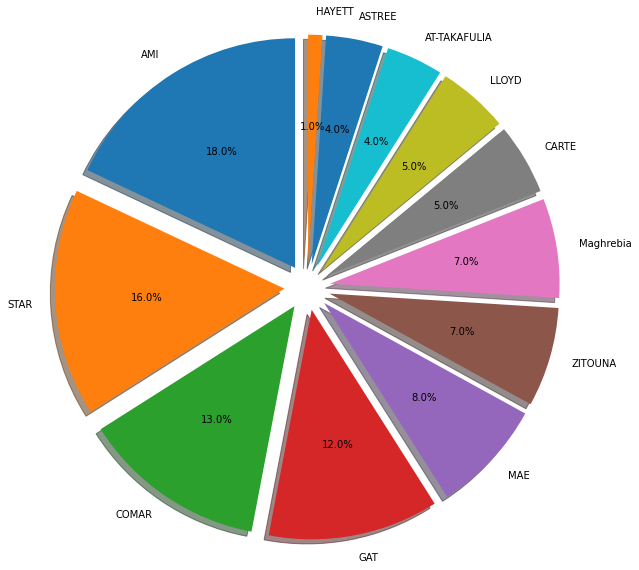

In [63]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'AMI', 'STAR', 'COMAR', 'GAT','MAE','ZITOUNA','Maghrebia','CARTE','LLOYD','AT-TAKAFULIA','ASTREE','HAYETT'
sizes = data['Pourcentage']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

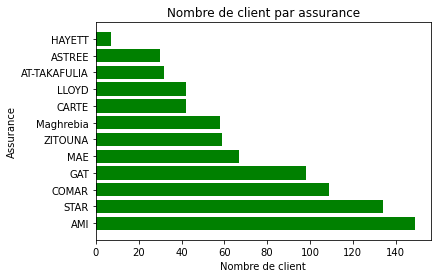

In [86]:
x = ['AMI', 'STAR', 'COMAR', 'GAT','MAE','ZITOUNA','Maghrebia','CARTE','LLOYD','AT-TAKAFULIA','ASTREE','HAYETT']
energy = data['Nombre']


x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='green')
plt.ylabel("Assurance")
plt.xlabel("Nombre de client")
plt.title("Nombre de client par assurance")

plt.yticks(x_pos, x)
plt.show()